In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

path = "/content/drive/MyDrive/LLM/Sales Records.csv"
df = pd.read_csv(path)

df.head()

Mounted at /content/drive


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [ ]:
# Drop unnecessary columns to have less complicated dataset
cols_to_remove = ["Order ID", "Ship Date", "Total Revenue", "Total Cost"]
df = df.drop(columns=cols_to_remove)

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,934,152.58,97.44,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,4551,437.20,263.33,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,9986,9.33,6.92,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,9118,81.73,56.67,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,5858,668.27,502.54,970846.34


In [ ]:
# Organize the order of the dataset based on the Order Date

df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")
df = df.sort_values("Order Date")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Units Sold,Unit Price,Unit Cost,Total Profit
57182,Europe,Switzerland,Cosmetics,Online,M,2010-01-01,6584,437.20,263.33,1144760.08
18933,Europe,Finland,Baby Food,Online,H,2010-01-01,4942,255.28,159.42,473740.12
67571,Central America and the Caribbean,Dominica,Clothes,Online,C,2010-01-01,6507,109.28,35.84,477874.08
97256,Middle East and North Africa,Lebanon,Household,Online,L,2010-01-01,3865,668.27,502.54,640546.45
76706,Asia,Sri Lanka,Meat,Offline,M,2010-01-01,8297,421.89,364.69,474588.40


In [ ]:
# Extract day, month, and year of each order for better modeling
df["year"] = df["Order Date"].dt.year
df["month"] = df["Order Date"].dt.month
df["day"] = df["Order Date"].dt.day
df = df.drop(columns=["Order Date"])
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Profit,year,month,day
57182,Europe,Switzerland,Cosmetics,Online,M,6584,437.20,263.33,1144760.08,2010,1,1
18933,Europe,Finland,Baby Food,Online,H,4942,255.28,159.42,473740.12,2010,1,1
67571,Central America and the Caribbean,Dominica,Clothes,Online,C,6507,109.28,35.84,477874.08,2010,1,1
97256,Middle East and North Africa,Lebanon,Household,Online,L,3865,668.27,502.54,640546.45,2010,1,1
76706,Asia,Sri Lanka,Meat,Offline,M,8297,421.89,364.69,474588.40,2010,1,1


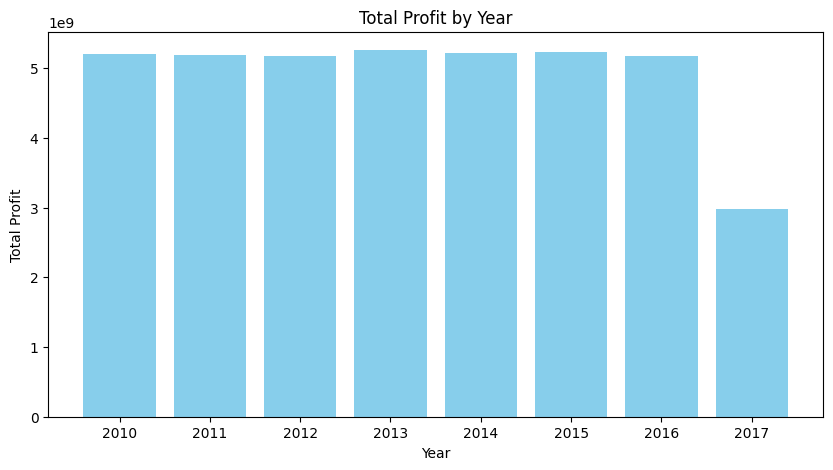

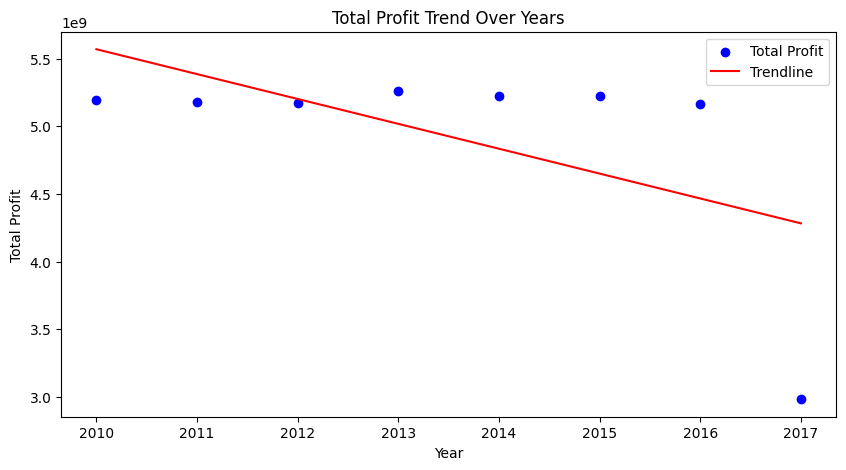

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and sum Total Profit
profit_by_year = df.groupby("year")["Total Profit"].sum().reset_index()

# Plot as a bar chart
plt.figure(figsize=(10,5))
plt.bar(profit_by_year["year"], profit_by_year["Total Profit"], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Total Profit by Year")
plt.xticks(profit_by_year["year"])  # show each year on x-axis
plt.show()

# Plot as a regression line to show trend
import numpy as np

x = profit_by_year["year"].values
y = profit_by_year["Total Profit"].values

# Linear fit
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10,5))
plt.scatter(x, y, color='blue', label='Total Profit')
plt.plot(x, m*x + b, color='red', label='Trendline')
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Total Profit Trend Over Years")
plt.legend()
plt.show()

In [ ]:
# check missing
print("Any nulls?", df.isnull().any().any())

Any nulls? False


In [ ]:
# Split the data into train, validation and test

# Total number of data points
n = len(df)

# Define split sizes
train_size = int(n * 0.7)      # 70%
val_size = int(n * 0.15)       # 15%
test_size = n - train_size - val_size  # Remaining 15%

# Split the data
train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

# Check sizes
print("Train:", len(train_df))
print("Validation:", len(val_df))
print("Test:", len(test_df))

Train: 70000
Validation: 15000
Test: 15000


In [ ]:
import numpy as np

def add_cyclic_features(df):
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

train_df = add_cyclic_features(train_df)
val_df = add_cyclic_features(val_df)
test_df = add_cyclic_features(test_df)

# Numerical features: include numeric columns + year + day + cyclic month
numerical_cols = ["Units Sold", "Unit Price", "Unit Cost", "year", "day", "month_sin", "month_cos"]

# Categorical features
categorical_cols = ["Region", "Country", "Item Type", "Sales Channel", "Order Priority"]

# Target column
target_col = "Total Profit"

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split train features and target
X_train = train_df[numerical_cols + categorical_cols]
y_train = train_df[target_col]

# Fit on train
X_train_scaled = preprocessor.fit_transform(X_train)

X_val = val_df[numerical_cols + categorical_cols]
y_val = val_df[target_col]

X_test = test_df[numerical_cols + categorical_cols]
y_test = test_df[target_col]

# Transform
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape)
print("Test shape:", X_test_scaled.shape)

/tmp/ipython-input-4079293872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
/tmp/ipython-input-4079293872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
/tmp/ipython-input-4079293872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Train shape: (70000, 217)
Validation shape: (15000, 217)
Test shape: (15000, 217)


In [ ]:
import numpy as np

def create_sliding_windows(X, y, input_steps=70, output_steps=5):
    """
    Create sliding windows for time series.

    Parameters:
        X : numpy array or sparse matrix, features
        y : numpy array, target
        input_steps : number of past rows as input
        output_steps : number of rows to predict

    Returns:
        X_windows : numpy array (num_samples, input_steps, num_features)
        y_windows : numpy array (num_samples, output_steps)
    """

    # Convert to dense numpy array if X is sparse
    X = X.toarray() if hasattr(X, "toarray") else X
    y = np.array(y)

    X_windows = []
    y_windows = []

    for i in range(len(X) - input_steps - output_steps + 1):
        X_windows.append(X[i:i+input_steps])
        y_windows.append(y[i+input_steps:i+input_steps+output_steps])

    return np.array(X_windows), np.array(y_windows)


# Define input and output steps
input_steps = 70
output_steps = 5

# Convert all scaled features to dense arrays (just to be safe)
X_train_scaled = X_train_scaled.toarray() if hasattr(X_train_scaled, "toarray") else X_train_scaled
X_val_scaled   = X_val_scaled.toarray()   if hasattr(X_val_scaled, "toarray") else X_val_scaled
X_test_scaled  = X_test_scaled.toarray()  if hasattr(X_test_scaled, "toarray") else X_test_scaled

# Train
X_train_windows, y_train_windows = create_sliding_windows(X_train_scaled, y_train.values, input_steps, output_steps)

# Validation
X_val_windows, y_val_windows = create_sliding_windows(X_val_scaled, y_val.values, input_steps, output_steps)

# Test
X_test_windows, y_test_windows = create_sliding_windows(X_test_scaled, y_test.values, input_steps, output_steps)

# Check shapes
print("X_train_windows:", X_train_windows.shape)
print("y_train_windows:", y_train_windows.shape)
print("X_val_windows:", X_val_windows.shape)
print("X_test_windows:", X_test_windows.shape)

X_train_windows: (69926, 70, 217)
y_train_windows: (69926, 5)
X_val_windows: (14926, 70, 217)
X_test_windows: (14926, 70, 217)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import Adam

In [ ]:
# Function for Evaluation

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# 1) Define model
# ----------------------------
lstm_model = Sequential()

# First LSTM layer
lstm_model.add(LSTM(
    64,
    return_sequences=False,    # only final output (target is many-to-one)
    input_shape=(X_train_windows.shape[1], X_train_windows.shape[2])
))

# Dropout to prevent overfitting
lstm_model.add(Dropout(0.3))   # 30% units dropped

# Dense layer for learning nonlinear relationships
lstm_model.add(Dense(32, activation='relu'))

# Final output layer: predicts all future steps at once
lstm_model.add(Dense(y_train_windows.shape[1]))

# ----------------------------
# 2) Compile with custom learning rate
# ----------------------------
optimizer = Adam(learning_rate=0.0005)   # LOWER LR → smoother and more stable

lstm_model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

lstm_model.summary()

# ----------------------------
# 3) Train with early stopping
# ----------------------------
history_lstm = lstm_model.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop]
)

# ----------------------------
# 4) Predict + evaluate
# ----------------------------
y_pred_lstm = lstm_model.predict(X_test_windows)
evaluate_model(y_test_windows, y_pred_lstm)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,437 (290.77 KB)

 Trainable params: 74,437 (290.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 300155142144.0000 - mae: 394262.2500 - val_loss: 296593719296.0000 - val_mae: 393304.1875
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 298164256768.0000 - mae: 392207.0312 - val_loss: 293927845888.0000 - val_mae: 389992.2812
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 295490322432.0000 - mae: 388370.3125 - val_loss: 290079375360.0000 - val_mae: 385370.0000
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 290161655808.0000 - mae: 383221.9375 - val_loss: 285287841792.0000 - val_mae: 379899.3125
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 285533700096.0000 - mae: 377813.3125 - val_loss: 279695884288.0000 - val_mae: 373936.0938
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 280319918080.0000 - mae: 372541.8438 - val_loss: 273414701056.0000 - val_mae: 367618.0625
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 272899686400.0000 - mae:

In [ ]:
# GRU
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(X_train_windows.shape[1], X_train_windows.shape[2])))
gru_model.add(Dense(y_train_windows.shape[1]))

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.summary()

# Train
history_gru = gru_model.fit(
    X_train_windows, y_train_windows,
    validation_data=(X_val_windows, y_val_windows),
    epochs=50, batch_size=64,
    callbacks=[early_stop]
)

# Predict and evaluate
y_pred_gru = gru_model.predict(X_test_windows)
evaluate_model(y_test_windows, y_pred_gru)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        54,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,661 (213.52 KB)

 Trainable params: 54,661 (213.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 300018532352.0000 - mae: 394490.5625 - val_loss: 297574105088.0000 - val_mae: 394540.5312
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 301540081664.0000 - mae: 395686.5938 - val_loss: 297518235648.0000 - val_mae: 394469.8750
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 299754684416.0000 - mae: 394219.5000 - val_loss: 297462595584.0000 - val_mae: 394399.3438
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 298146824192.0000 - mae: 393337.0625 - val_loss: 297406955520.0000 - val_mae: 394328.8750
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 298380918784.0000 - mae: 393209.9062 - val_loss: 297351348224.0000 - val_mae: 394258.6250
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 299209687040.0000 - mae: 393948.6250 - val_loss: 297295708160.0000 - val_mae: 394188.3438
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 297910468608.0000 - mae: 

In [ ]:
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# Explanation:
# 64 neurons → a good starting point for below 10k samples and ~dozens of features.
# 'relu' → avoids vanishing gradient, standard for hidden layers.

model.add(Dropout(0.2))
# Explanation:
# Dropout 0.2 → randomly ignores 20% of neurons during training
# Helps prevent overfitting, especially when the dataset is not huge.

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# Explanation:
# 32 neurons → smaller layer helps compress information
# Using 2 layers allows the network to learn more complex relationships.

# Third hidden layer (optional)
model.add(Dense(16, activation='relu'))
# Fewer neurons → network can learn higher-level abstract patterns

# Output layer
output_shape = 1  # As predicting is regression
model.add(Dense(output_shape, activation='linear'))
# Explanation:
# Linear activation for regression (predict numeric value)

model.compile(
    optimizer=Adam(learning_rate=0.001),  # default lr 0.001
    loss='mean_squared_error',            # regression loss
    metrics=['mean_absolute_error']       # easy-to-interpret metric
)

history = model.fit(
    X_train_scaled, y_train,          # training data
    epochs=50,                        # max number of passes through dataset
    batch_size=64,                      # number of samples per gradient update
    callbacks=[early_stop],             # stop early if no improvement
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 260885987328.0000 - mean_absolute_error: 359005.8750
Epoch 2/50
  77/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52293427200.0000 - mean_absolute_error: 162387.7031

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error
  current = self.get_monitor_value(logs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 45098401792.0000 - mean_absolute_error: 145811.3906
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21645996032.0000 - mean_absolute_error: 100050.3516
Epoch 4/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14781140992.0000 - mean_absolute_error: 90382.7266
Epoch 5/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12148747264.0000 - mean_absolute_error: 81871.3047
Epoch 6/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9410273280.0000 - mean_absolute_error: 69258.0000
Epoch 7/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7374259200.0000 - mean_absolute_error: 60596.3125
Epoch 8/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6768664064.0000 - mean_absolute_error: 57110.3750
Epoch 9/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6037744640.0000 - mean_absolute_error: 53564.7109
Epoch 10/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5964550144.0000 - mean_absolute_error: 52140.0

In [ ]:
# Predict + evaluate
# ----------------------------
y_pred_nn = model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_nn)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
MAE: 7092.2498, RMSE: 8968.4027, R2: 0.9995


Feedforward neural network achieved lower MAE than time-series models under the same data and evaluation settings!

In [ ]:
cols_to_remove = ["Country"]
df2 = df.drop(columns=cols_to_remove)

df2.head()

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Profit,year,month,day
57182,Europe,Cosmetics,Online,M,6584,437.20,263.33,1144760.08,2010,1,1
18933,Europe,Baby Food,Online,H,4942,255.28,159.42,473740.12,2010,1,1
67571,Central America and the Caribbean,Clothes,Online,C,6507,109.28,35.84,477874.08,2010,1,1
97256,Middle East and North Africa,Household,Online,L,3865,668.27,502.54,640546.45,2010,1,1
76706,Asia,Meat,Offline,M,8297,421.89,364.69,474588.40,2010,1,1


In [ ]:
# Split the data into train, validation and test

# Total number of data points
n2 = len(df2)

# Define split sizes
train_size2 = int(n2 * 0.7)      # 70%
val_size2 = int(n2 * 0.15)       # 15%
test_size2 = n2 - train_size2 - val_size2  # Remaining 15%

# Split the data
train_df2 = df2.iloc[:train_size2]
val_df2 = df2.iloc[train_size2:train_size2 + val_size2]
test_df2 = df2.iloc[train_size2 + val_size2:]

# Check sizes
print("Train:", len(train_df2))
print("Validation:", len(val_df2))
print("Test:", len(test_df2))

Train: 70000
Validation: 15000
Test: 15000


In [ ]:
import numpy as np

def add_cyclic_features(df2):
    df2['month_sin'] = np.sin(2 * np.pi * df2['month'] / 12)
    df2['month_cos'] = np.cos(2 * np.pi * df2['month'] / 12)
    return df2

train_df2 = add_cyclic_features(train_df2)
val_df2 = add_cyclic_features(val_df2)
test_df2 = add_cyclic_features(test_df2)

# Numerical features: include numeric columns + year + day + cyclic month
numerical_cols2 = ["Units Sold", "Unit Price", "Unit Cost", "year", "day", "month_sin", "month_cos"]

# Categorical features
categorical_cols2 = ["Region", "Item Type", "Sales Channel", "Order Priority"]

# Target column
target_col2 = "Total Profit"

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols2)
    ]
)

# Split train features and target
X_train2 = train_df2[numerical_cols2 + categorical_cols2]
y_train2 = train_df2[target_col2]

# Fit on train
X_train_scaled2 = preprocessor.fit_transform(X_train2)

X_val2 = val_df2[numerical_cols2 + categorical_cols2]
y_val2 = val_df2[target_col2]

X_test2 = test_df2[numerical_cols2 + categorical_cols2]
y_test2 = test_df2[target_col2]

# Transform
X_val_scaled2 = preprocessor.transform(X_val2)
X_test_scaled2 = preprocessor.transform(X_test2)

print("Train shape:", X_train_scaled2.shape)
print("Validation shape:", X_val_scaled2.shape)
print("Test shape:", X_test_scaled2.shape)

Train shape: (70000, 32)
Validation shape: (15000, 32)
Test shape: (15000, 32)


/tmp/ipython-input-3361714732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_sin'] = np.sin(2 * np.pi * df2['month'] / 12)
/tmp/ipython-input-3361714732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_cos'] = np.cos(2 * np.pi * df2['month'] / 12)


In [ ]:
import numpy as np

def create_sliding_windows2(X2, y2, input_steps2=70, output_steps2=5):
    """
    Create sliding windows for time series.

    Parameters:
        X2 : numpy array or sparse matrix, features
        y2 : numpy array, target
        input_steps : number of past rows as input
        output_steps : number of rows to predict

    Returns:
        X_windows2 : numpy array (num_samples, input_steps, num_features)
        y_windows2 : numpy array (num_samples, output_steps)
    """

    # Convert to dense numpy array if X is sparse
    X2 = X2.toarray() if hasattr(X2, "toarray") else X2
    y2 = np.array(y2)

    X_windows2 = []
    y_windows2 = []

    for i in range(len(X2) - input_steps2 - output_steps2 + 1):
        X_windows2.append(X2[i:i+input_steps2])
        y_windows2.append(y2[i+input_steps2:i+input_steps2+output_steps2])

    return np.array(X_windows2), np.array(y_windows2)


# Define input and output steps
input_steps2 = 70
output_steps2 = 5

# Convert all scaled features to dense arrays (just to be safe)
X_train_scaled2 = X_train_scaled2.toarray() if hasattr(X_train_scaled2, "toarray") else X_train_scaled2
X_val_scaled2   = X_val_scaled2.toarray()   if hasattr(X_val_scaled2, "toarray") else X_val_scaled2
X_test_scaled2  = X_test_scaled2.toarray()  if hasattr(X_test_scaled2, "toarray") else X_test_scaled2

# Train
X_train_windows2, y_train_windows2 = create_sliding_windows2(X_train_scaled2, y_train2.values, input_steps2, output_steps2)

# Validation
X_val_windows2, y_val_windows2 = create_sliding_windows2(X_val_scaled2, y_val2.values, input_steps2, output_steps2)

# Test
X_test_windows2, y_test_windows2 = create_sliding_windows2(X_test_scaled2, y_test2.values, input_steps2, output_steps2)

# Check shapes
print("X_train_windows:", X_train_windows2.shape)
print("y_train_windows:", y_train_windows2.shape)
print("X_val_windows:", X_val_windows2.shape)
print("X_test_windows:", X_test_windows2.shape)

X_train_windows: (69926, 70, 32)
y_train_windows: (69926, 5)
X_val_windows: (14926, 70, 32)
X_test_windows: (14926, 70, 32)


In [ ]:
# 1) Define model
# ----------------------------
lstm_model2 = Sequential()

# First LSTM layer
lstm_model2.add(LSTM(
    64,
    return_sequences=False,    # only final output (target is many-to-one)
    input_shape=(X_train_windows2.shape[1], X_train_windows2.shape[2])
))

# Dropout to prevent overfitting
lstm_model2.add(Dropout(0.3))   # 30% units dropped

# Dense layer for learning nonlinear relationships
lstm_model2.add(Dense(32, activation='relu'))

# Final output layer: predicts all future steps at once
lstm_model2.add(Dense(y_train_windows2.shape[1]))

# ----------------------------
# 2) Compile with custom learning rate
# ----------------------------
optimizer = Adam(learning_rate=0.0005)   # LOWER LR → smoother and more stable

lstm_model2.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

lstm_model2.summary()

# ----------------------------
# 3) Train with early stopping
# ----------------------------
history_lstm2 = lstm_model2.fit(
    X_train_windows2, y_train_windows2,
    validation_data=(X_val_windows2, y_val_windows2),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop]
)

# ----------------------------
# 4) Predict + evaluate
# ----------------------------
y_pred_lstm2 = lstm_model2.predict(X_test_windows2)
evaluate_model(y_test_windows2, y_pred_lstm2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,077 (105.77 KB)

 Trainable params: 27,077 (105.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 299802427392.0000 - mae: 394538.9062 - val_loss: 296901869568.0000 - val_mae: 393691.7812
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 297119481856.0000 - mae: 391387.5312 - val_loss: 295016759296.0000 - val_mae: 391335.3125
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 296745730048.0000 - mae: 390270.9375 - val_loss: 292288593920.0000 - val_mae: 387999.5000
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 291397763072.0000 - mae: 385107.8438 - val_loss: 288866336768.0000 - val_mae: 383954.7812
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 289106231296.0000 - mae: 382019.0938 - val_loss: 284853927936.0000 - val_mae: 379419.4062
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 284194111488.0000 - mae: 376621.3125 - val_loss: 280199200768.0000 - val_mae: 374452.7500
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 281366495232.0000 - mae: 3

In [ ]:
model2 = Sequential()

# Input layer + first hidden layer
model2.add(Dense(64, activation='relu', input_shape=(X_train_scaled2.shape[1],)))
# Explanation:
# 64 neurons → a good starting point for below 10k samples and ~dozens of features.
# 'relu' → avoids vanishing gradient, standard for hidden layers.

model2.add(Dropout(0.2))
# Explanation:
# Dropout 0.2 → randomly ignores 20% of neurons during training
# Helps prevent overfitting, especially when the dataset is not huge.

# Second hidden layer
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
# Explanation:
# 32 neurons → smaller layer helps compress information
# Using 2 layers allows the network to learn more complex relationships.

# Third hidden layer (optional)
model2.add(Dense(16, activation='relu'))
# Fewer neurons → network can learn higher-level abstract patterns

# Output layer
output_shape = 1  # As predicting is regression
model2.add(Dense(output_shape, activation='linear'))
# Explanation:
# Linear activation for regression (predict numeric value)

model2.compile(
    optimizer=Adam(learning_rate=0.001),  # default lr 0.001
    loss='mean_squared_error',            # regression loss
    metrics=['mean_absolute_error']       # easy-to-interpret metric
)

history = model2.fit(
    X_train_scaled2, y_train2,          # training data
    epochs=50,                        # max number of passes through dataset
    batch_size=64,                      # number of samples per gradient update
    callbacks=[early_stop],             # stop early if no improvement
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 255194873856.0000 - mean_absolute_error: 354438.1250
Epoch 2/50
  75/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 47254269952.0000 - mean_absolute_error: 150671.4062

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error
  current = self.get_monitor_value(logs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 42247479296.0000 - mean_absolute_error: 139641.7500
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19808249856.0000 - mean_absolute_error: 96487.6016
Epoch 4/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12348034048.0000 - mean_absolute_error: 82570.3438
Epoch 5/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9131680768.0000 - mean_absolute_error: 68749.8281
Epoch 6/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7062537728.0000 - mean_absolute_error: 58929.1133
Epoch 7/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6045552640.0000 - mean_absolute_error: 53902.0547
Epoch 8/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5445854720.0000 - mean_absolute_error: 50318.2461
Epoch 9/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5162529792.0000 - mean_absolute_error: 47935.3516
Epoch 10/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4837713920.0000 - mean_absolute_error: 45946.953

In [ ]:
# Predict + evaluate
# ----------------------------
y_pred_nn2 = model2.predict(X_test_scaled2)
evaluate_model(y_test2, y_pred_nn2)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 7920.5013, RMSE: 10683.4996, R2: 0.9992
